In [1]:
import numpy as np 
import pandas as pd 
import cv2
from matplotlib import pyplot as plt

import os


def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(np.uint8(img),cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()

In [2]:
def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    else:
        return np.ones((8,8)) #it suppose to return original image back

In [3]:
import cv2
import pickle
# imgTemp = cv2.imread('/home/rushil/Documents/Academics/Image Processing/Image Processing/compressedText.txt', 'rb')
# imgTemp = imgTemp[:, :, [0, 1, 2]]
# print(imgTemp[0])

# f = open('/home/rushil/Documents/Academics/Image Processing/Image Processing/compressedText.txt','rb')
# imgTemp = pickle.load(f)
# imgTemp = imgTemp[:, :, [0, 1, 2]]
# print(imgTemp[0])
filename = '/home/rushil/Documents/Academics/Image Processing/Image Processing/ci'
infile = open(filename,'rb')
imgTemp = pickle.load(infile)
infile.close()
imgTemp = imgTemp[:, :, [0, 1, 2]]
print(imgTemp[0])

[[261.  18. -18.]
 [ -4.   5.  10.]
 [  4.   0.  -0.]
 ...
 [  0.  -0.  -1.]
 [ -1.  -1.  -1.]
 [  0.  -0.  -0.]]


In [4]:
height  = len(imgTemp) #one column of image
width = len(imgTemp[0]) # one row of image
sliced = [] # new list for 8x8 sliced image 

block = 8

print(imgTemp[:,:,0]);

#print(height)
# print(width)

print("Dimensions of image:")
print(imgTemp.shape)
# print(img)


[[261.  -4.   4. ...   0.  -1.   0.]
 [ -1.   0.   0. ...  -0.  -0.  -0.]
 [ -0.  -0.  -0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.  -0.]
 [  0.  -0.  -0. ...  -0.  -0.  -0.]
 [  0.  -0.  -0. ...   0.   0.   0.]]
Dimensions of image:
(512, 512, 3)


[261.  18. -18.]


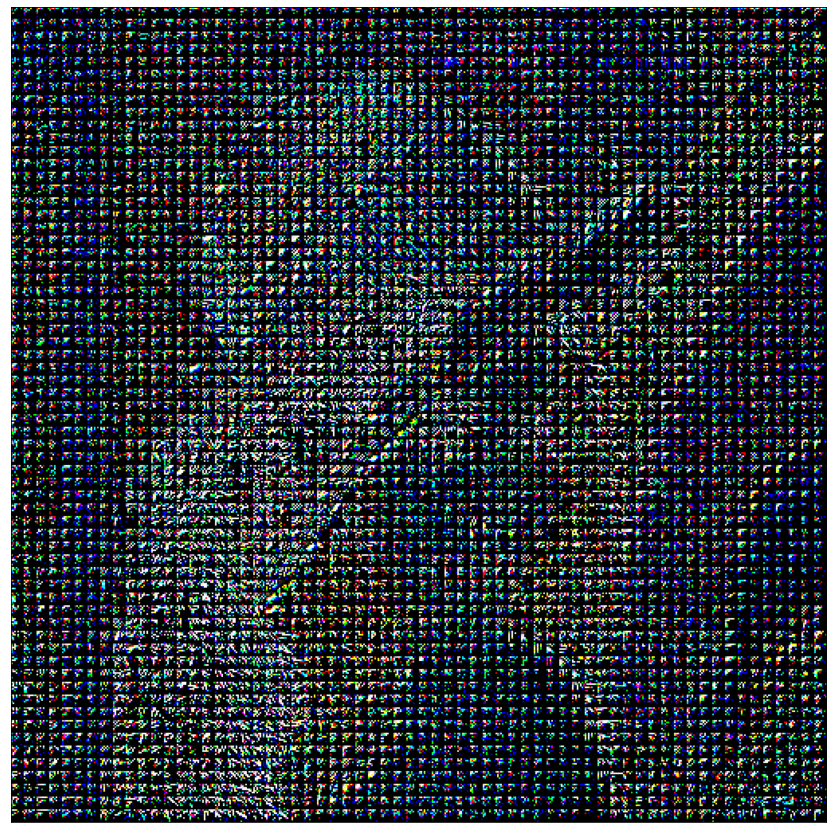

In [5]:
img = np.ones((len(imgTemp[:,:,0]),len(imgTemp[:,:,0][0]),3))



for k in range(0,3,1):
    index = 0
    currY = 0 #current Y index
    for i in range(block,height+1,block):
        currX = 0 #current X index
        for j in range(block,width+1,block):
            #print(imgDel[currY:i, currX:j, k])
            img[currY:i, currX:j, k] = imgTemp[currY:i, currX:j, k] #- np.ones((8,8))*128
            #print(np.ones((8,8))*128)
            #print("After Subtraction")
            #print(newImg[currY:i, currX:j, k])
            index = index+1
            currX = j
        currY = i

        


print(img[0][0])
showImage(img)


In [6]:
sliced = []
temp = []

#For each z dimension
for k in range(0,3,1):
    #temp.clear() #Clearing temporary array on every iteration
    temp = []
    index = 0
    currY = 0 #current Y index
    for i in range(block,height+1,block):
        currX = 0 #current X index
        for j in range(block,width+1,block):
            
            #Making blocks of 2x2 from the matrix
            temp.append(img[currY:i, currX:j, k]) #appending blocks to a temporary array
            
            npTemp = np.array(temp)
            npTemp = npTemp.astype(float)
            
            #temp = npTemp.tolist()
            
            currX = j
        currY = i
        
    

    sliced.append(npTemp) #Appending temporary array to final array
print(sliced[0][0])
    

[[261.  -4.   4.   1.  -0.  -0.  -0.   0.]
 [ -1.   0.   0.   0.   0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.  -0.  -0.   0.   0.]
 [  1.   0.   0.   0.  -0.  -0.   0.  -0.]
 [ -1.  -0.  -0.  -0.   0.   0.  -0.   0.]
 [  0.   0.   0.   0.  -0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.   0.  -0.   0.   0.]
 [  0.  -0.   0.   0.  -0.   0.  -0.  -0.]]


In [7]:
selectedQMatrix = selectQMatrix("Q90")

invQuantTemp = []
invQuantSliced = []
temp = []



for k in range(0,3,1):
    invQuantTemp = []
    temp = []
    for x in sliced[k]:
        #print(x)
        x = np.round(x * selectedQMatrix)
        #print("gap")
        #print(x)
        temp.append(x)
    invQuantSliced.append(temp)

print(invQuantSliced[0][0])

[[783.  -8.   8.   3.  -0.  -0.  -0.   0.]
 [ -2.   0.   0.   0.   0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.  -0.  -0.   0.   0.]
 [  3.   0.   0.   0.  -0.  -0.   0.  -0.]
 [ -4.  -0.  -0.  -0.   0.   0.  -0.   0.]
 [  0.   0.   0.   0.  -0.   0.  -0.  -0.]
 [ -0.  -0.  -0.  -0.   0.  -0.   0.   0.]
 [  0.  -0.   0.   0.  -0.   0.  -0.  -0.]]


In [8]:
invDCTSliced = []
invDCTTemp = []

for k in range(0,3,1):
    invDCTTemp = []
    temp = []
    for x in invQuantSliced[k]:
        #print(x)
        invDCTx = cv2.idct(x)
        #print("gap")
        #print(invDCTx)
        temp.append(invDCTx)
    invDCTSliced.append(temp)
    #print(len(invDCTTemp))
    

In [9]:
revTemp = []
revSliced = []

for k in range(0,3,1):
    revTemp = []
    temp = []
    for x in invDCTSliced[k]:
        x = x + np.ones((8,8))*128
        x = np.round(x)
        #print(x)
        temp.append(x)
    revSliced.append(temp)
    #print(len(revTemp))
#print(len(revSliced))

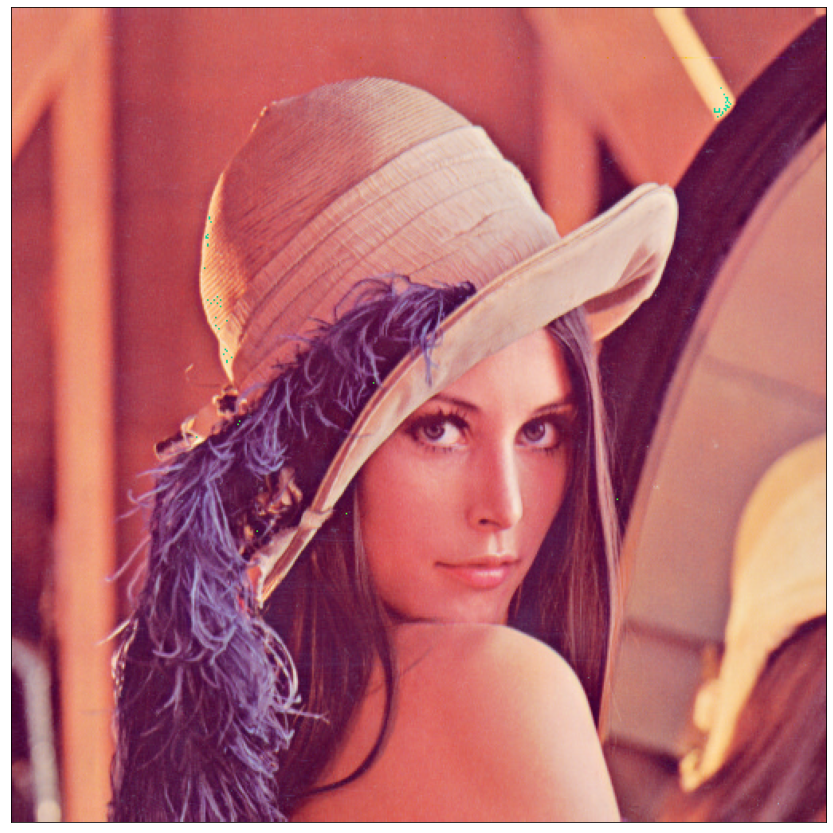

Original


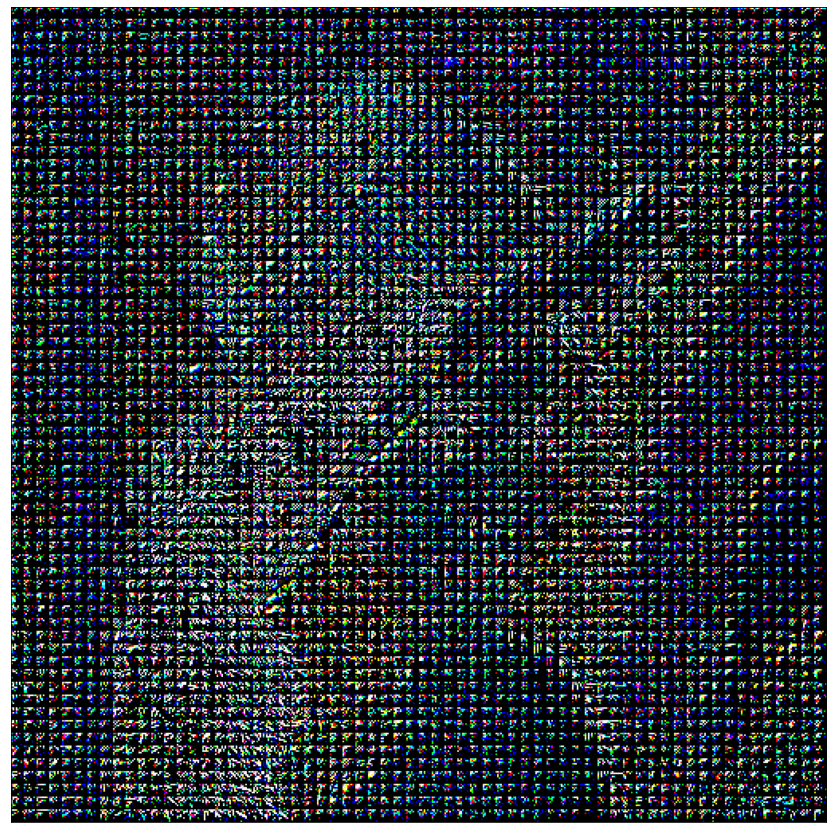

In [10]:
rowCount = np.round(len(img[:,:,0])/block)

columnCount = np.round(len(img[:,:,0][0])/block)



npCompImg =np.zeros(  (len(img[:,:,0]),len(img[:,:,0][0]), 3) )

#print(revSliced[0])

for k in range(0,3,1):
    compressedImg = np.ones((len(img[:,:,0]),len(img[:,:,0][0])))
    index = 0
    currY = 0 #current Y index
    for i in range(block,height+1,block):
        currX = 0 #current X index
        for j in range(block,width+1,block):
            compressedImg[currY:i, currX:j] = revSliced[k][index]
            index = index+1
            currX = j
        currY = i
    npCompImg[:,:,k] = compressedImg


# print(npCompImg)
# print("Gap")
# print(img)


#plt.imshow(np.uint8(npCompImg))





showImage(npCompImg)
print("Original")
# img = img[:, :, [2, 1, 0]]
showImage(img)